In [ ]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od
url='https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'
od.download(url)

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


In [ ]:
import os
data_dir='./weather-dataset-rattle-package'
os.listdir(data_dir)
train_csv=data_dir+'/weatherAUS.csv'
!pip install pandas --quiet
import pandas as pd
raw_df=pd.read_csv(train_csv)
print(raw_df.info())
raw_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
raw_df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)
raw_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
!pip install plotly matplotlib seaborn --quiet
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#for good visualization - initial settings
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
px.histogram(raw_df,x='Location',color='RainToday',title='Loc vs Rainy.days')

In [ ]:
px.histogram(raw_df,x='Temp3pm',title='Temp at 3pm vs Rain tomorrow',color='RainTomorrow')

In [ ]:
px.histogram(raw_df,x='RainTomorrow',color='RainToday',title='RainToday vs RainTomorrow')

In [ ]:
px.scatter(raw_df.sample(2000),x='MinTemp',y='MaxTemp',color='RainToday',title='MinMaxTemp vs RainToday')

In [ ]:
use_sample=False                    #initially if one wants to setup the model with a smaller part of such a huge dataset, put use_sample to true.
sample_fraction=0.1
if(use_sample):
  raw_df=raw_df.sample(frac=sample_fraction).copy()
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14079 entries, 81739 to 46885
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           14079 non-null  object 
 1   Location       14079 non-null  object 
 2   MinTemp        14033 non-null  float64
 3   MaxTemp        14049 non-null  float64
 4   Rainfall       14079 non-null  float64
 5   Evaporation    8116 non-null   float64
 6   Sunshine       7411 non-null   float64
 7   WindGustDir    13203 non-null  object 
 8   WindGustSpeed  13207 non-null  float64
 9   WindDir9am     13157 non-null  object 
 10  WindDir3pm     13706 non-null  object 
 11  WindSpeed9am   13987 non-null  float64
 12  WindSpeed3pm   13823 non-null  float64
 13  Humidity9am    13932 non-null  float64
 14  Humidity3pm    13720 non-null  float64
 15  Pressure9am    12697 non-null  float64
 16  Pressure3pm    12690 non-null  float64
 17  Cloud9am       8846 non-null   float64
 18  Cloud3p

In [ ]:
from sklearn.model_selection import train_test_split
train_val_df,test_df=train_test_split(raw_df,test_size=0.2,random_state=1)
train_df,val_df=train_test_split(raw_df,test_size=0.25,random_state=1)
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(10559, 23)
(3520, 23)
(2816, 23)


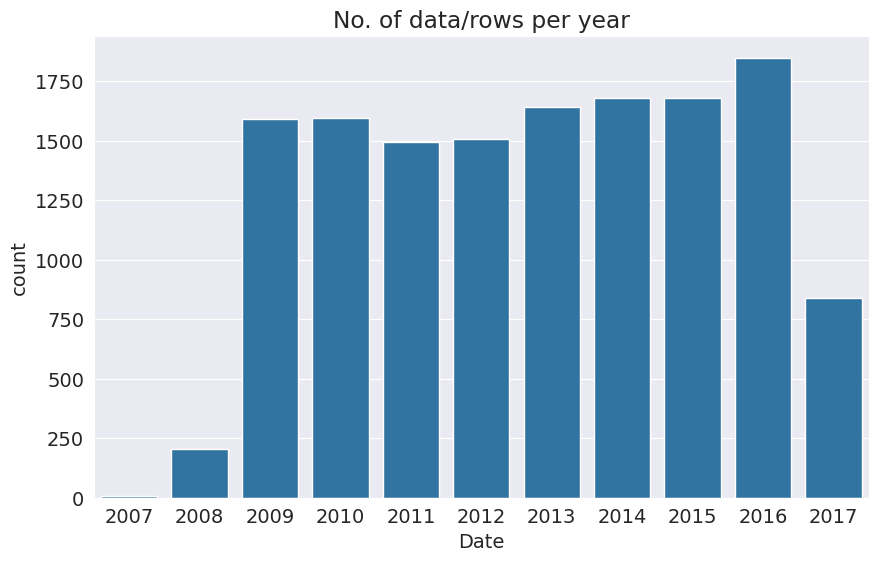

In [ ]:
plt.title('No. of data/rows per year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);
#fig=px.histogram(pd.to_datetime(raw_df.Date).dt.year)
#fig.update_layout(bargap=0.1)
#fig.show()

In [ ]:
year=pd.to_datetime(raw_df.Date).dt.year           #for when the dataset contains date/time data.
train_df=raw_df[year<2015]                         #eventhough not a perfect 75/25 or 60/20/20 split - all the data in the date is split so that the model does not predict past data based on future data
val_df=raw_df[year==2015]
test_df=raw_df[year>2015]
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(9715, 23)
(1679, 23)
(2685, 23)


In [ ]:
input_cols=list(raw_df.columns)[1:-1] #no need for the date field also do not include the target column in the inputs
target_col='RainTomorrow'
input_cols

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [ ]:
train_inputs=train_df[input_cols].copy()
train_target=train_df[target_col].copy()
val_inputs=val_df[input_cols].copy()
val_target=val_df[target_col].copy()
test_inputs=test_df[input_cols].copy()
test_target=test_df[target_col].copy()

In [ ]:
!pip install numpy --quiet
import numpy as np
numerical_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols=train_inputs.select_dtypes('object').columns.tolist()
print(categorical_cols)
numerical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
train_inputs[categorical_cols].nunique()

,0
Location,49
WindGustDir,16
WindDir9am,16
WindDir3pm,16
RainToday,2


In [ ]:
from sklearn.impute import SimpleImputer        #process of filling missing values - imputation
imputer=SimpleImputer(strategy='mean')          #replacing missing values by the average of the column

In [ ]:
raw_df[numerical_cols].isna().sum()

,0
MinTemp,46
MaxTemp,30
Rainfall,0
Evaporation,5963
Sunshine,6668
WindGustSpeed,872
WindSpeed9am,92
WindSpeed3pm,256
Humidity9am,147
Humidity3pm,359


In [ ]:
imputer.fit(raw_df[numerical_cols])
list(imputer.statistics_)

[12.166585904653317,
 23.216755640970884,
 2.4171958235670146,
 5.445970921636274,
 7.631561192821482,
 40.088059362459305,
 14.006577536283691,
 18.699631049699775,
 69.01880562733275,
 51.219314868804666,
 1017.6676143971016,
 1015.2920882584714,
 4.42674655211395,
 4.485606418121756,
 16.962612419700214,
 21.70060838705005]

In [ ]:
train_inputs[numerical_cols] = imputer.transform(train_inputs[numerical_cols])          #replacing Nan values with average values
val_inputs[numerical_cols] = imputer.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols] = imputer.transform(test_inputs[numerical_cols])

In [ ]:
from sklearn.preprocessing import MinMaxScaler              #for scaling the values of numerical columns to give each field a level playing field for classification
scaler=MinMaxScaler()
scaler.fit(raw_df[numerical_cols])
print(scaler.data_max_)
print(scaler.data_min_)

[  31.4   46.4  278.4   68.8   14.3  120.    63.    63.   100.   100.
 1040.4 1037.7    9.     8.    37.9   45.9]
[ -6.4  -2.2   0.    0.    0.    7.    0.    0.    3.    2.  982.9 981.2
   0.    0.   -4.3  -3.8]


In [ ]:
train_inputs[numerical_cols] = scaler.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = scaler.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols] = scaler.transform(test_inputs[numerical_cols])

In [ ]:
from sklearn.preprocessing import OneHotEncoder            #for categorizing categorical coolumns into separate columns
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encoder.fit(raw_df[categorical_cols].fillna('UnKnown'))
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'UnKnown', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'UnKnown', 'W', 'WNW', 'WSW'], dtype=

In [ ]:
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))   #to name the newly created columns appropriately
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

<ipython-input-133-8be7b249d853>:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-133-8be7b249d853>:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-133-8be7b249d853>:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-133-8be7b249d853>:2: PerformanceWarning:

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear')
model.fit(train_inputs[numerical_cols+encoded_cols],train_target)

LogisticRegression(solver='liblinear')

In [ ]:
print(numerical_cols+encoded_cols)
print(model.coef_.tolist())

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [ ]:
pd.DataFrame({'feature':numerical_cols+encoded_cols,'weight':model.coef_.tolist()[0]})       #to show thw weights of each field

,feature,weight
0,MinTemp,0.582075
1,MaxTemp,-1.610212
2,Rainfall,1.179480
3,Evaporation,0.426643
4,Sunshine,-1.748269
...,...,...
113,WindDir3pm_W,-0.306551
114,WindDir3pm_WNW,-0.259526
115,WindDir3pm_WSW,-0.360560
116,RainToday_No,-1.273449


In [ ]:
x_train=train_inputs[numerical_cols+encoded_cols]
x_val=val_inputs[numerical_cols+encoded_cols]
x_test=test_inputs[numerical_cols+encoded_cols]
train_pred=model.predict(x_train)
print(train_target)
train_pred

81739      No
37692      No
37780      No
50407      No
40076      No
         ... 
106208     No
78293      No
46374     Yes
34425      No
46885     Yes
Name: RainTomorrow, Length: 9715, dtype: object


array(['Yes', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(train_target,train_pred)

0.8515697375193001

In [ ]:
model.predict_proba(x_train)          #to get the predictions as probability values

array([[0.06697418, 0.93302582],
       [0.92846291, 0.07153709],
       [0.99489043, 0.00510957],
       ...,
       [0.59440488, 0.40559512],
       [0.89005941, 0.10994059],
       [0.03316856, 0.96683144]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_target,train_pred,normalize='true')

array([[0.94777205, 0.05222795],
       [0.48652416, 0.51347584]])

In [ ]:
#helper function to generate predictions, compute the accuracy and then plot the confusion matrix
def predict_plot(inputs,target,name=""):
  preds=model.predict(inputs)
  accuracy=accuracy_score(target,preds)
  print("Accuracy is : ",accuracy)
  cf=confusion_matrix(target,preds,normalize='true')
  plt.figure()
  sns.heatmap(cf,annot=True)
  plt.xlabel('Prediction')
  plt.ylabel('Target')
  plt.title("{} Confusion Matrix".format(name))
  return preds

Accuracy is :  0.8515697375193001


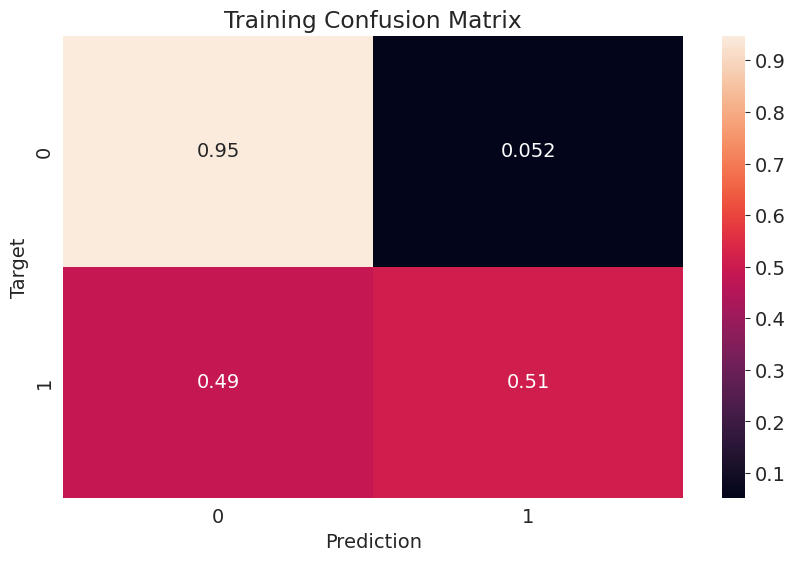

In [ ]:
train_preds=predict_plot(x_train,train_target,'Training')

Accuracy is :  0.8427635497319833


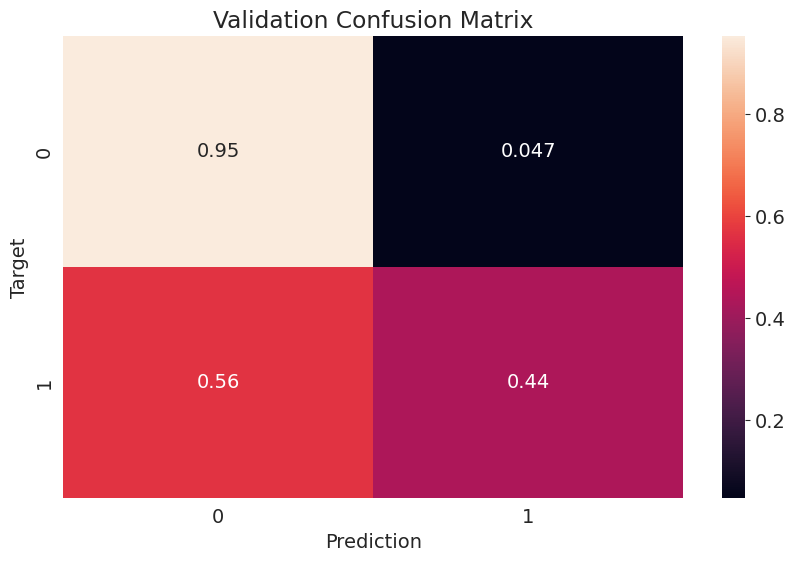

In [ ]:
val_preds = predict_plot(x_val,val_target,'Validation')

Accuracy is :  0.8439478584729981


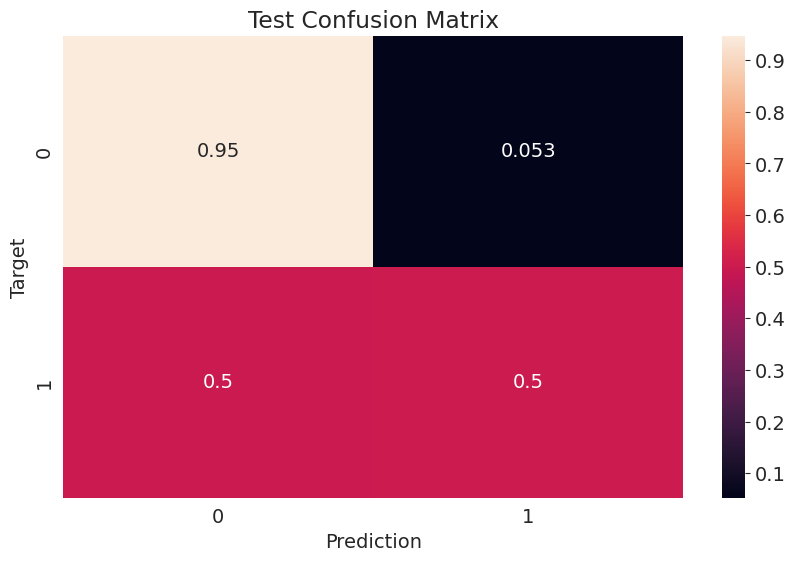

In [ ]:
test_preds = predict_plot(x_test, test_target,'Test')